In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np



data_dir = "../data"  
file_paths = {
    "benin": os.path.join(data_dir, "benin-malanville.csv"),
    "sierra_ leone": os.path.join(data_dir, "sierraleone-bumbuna.csv"),
    "togo": os.path.join(data_dir, "togo-dapaong_qc.csv"),
}



In [ ]:
# Read CSVs into DataFrames
dataframes = {}
for name, path in file_paths.items():
    dataframes[name] = pd.read_csv(path)
    


Histograms:


C:\Users\computer\Python_Lab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\computer\Python_Lab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\computer\Python_Lab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\computer\Python_Lab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

Error generating histograms: num must be an integer with 1 <= num <= 12, not 13


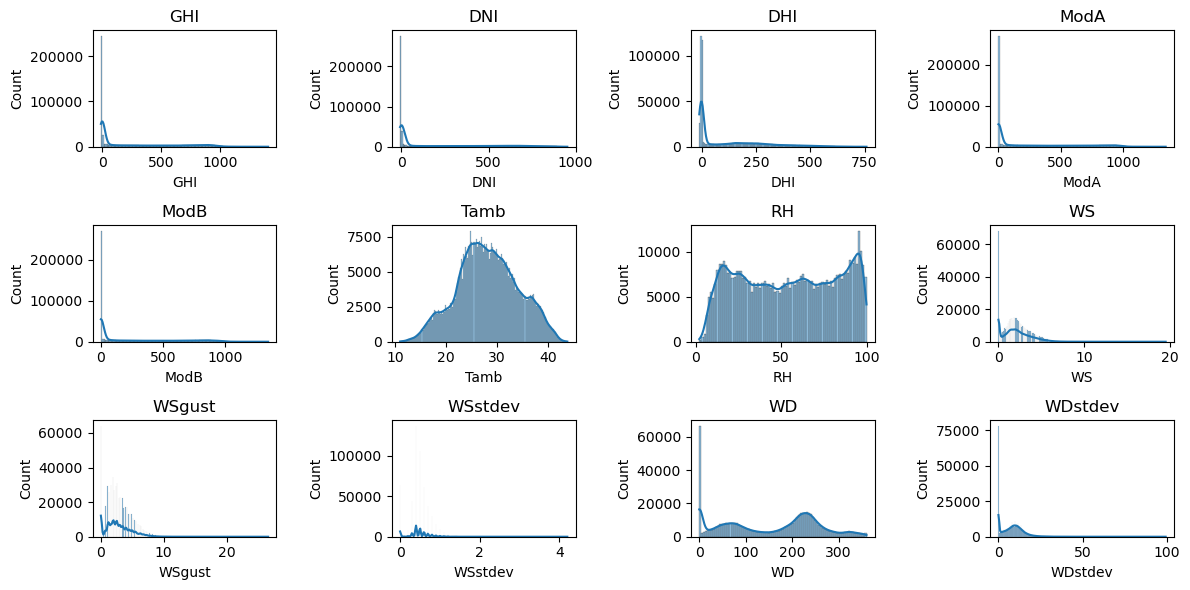

In [ ]:
# Function for  EDA on each DataFrame
def perform_eda(df, name):
    print(f"\n** {name.upper()} Data **")

    # Summary Statistics
    print("\nSummary Statistics:")
    summary = df.describe(include='all')
    print(summary.to_string())

    # Data Quality Check
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Check for outliers (using IQR)
    print("\nOutlier Detection (Interquartile Range):")
    for col in df.select_dtypes(include=[np.number]):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"- Column: {col}")
        if outliers.empty:
            print("  No outliers detected.")
        else:
            print(f"  Number of outliers: {outliers.shape[0]}")

    # Look for inconsistencies 
    print("\nInconsistency Check (Negative Values in Positive Columns):")
    for col in df.select_dtypes(include=[np.number]):
        if col in ["GHI", "DNI", "DHI", "WS", "Tamb", "TModA", "TModB"]:
            negatives = df[df[col] < 0]
            if negatives.empty:
                print(f"  Column: {col} - No negative values found.")
            else:
                print(f"  Column: {col} - {negatives.shape[0]} negative values found.")

    # Time Series Analysis (Optional)
    plt.figure(figsize=(12, 6))
    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        plt.plot(df['Timestamp'], df[col], label=col)
    plt.legend()
    plt.title(f"{name} - Time Series")
    plt.show()

    # Correlation Analysis
    print("\nCorrelation Matrix:")
    corr = df.select_dtypes(include=[np.number]).corr()
    print(corr.to_string())

    # Wind Analysis
    print("\nWind Analysis:")
    sns.jointplot(x="WS", y="WSgust", data=df)
    plt.title(f"{name} - Wind Speed Distribution")
    plt.show()

    # Temperature Analysis
    print("\nTemperature Analysis:")
    sns.jointplot(x="Tamb", y="TModA", data=df)
    plt.title(f"{name} - Ambient vs. Module A Temperature")
    plt.show()

    # Histograms
try:
  print("\nHistograms:")

  # Loop through each DataFrame in the dictionary
  for name, df in dataframes.items():
    # Replace inf with NaN (recommended)
    df = df.replace(to_replace=np.inf, value=np.nan)

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(numeric_cols):
      plt.subplot(3, 4, i+1)
      sns.histplot(df[col], kde=True)  
      plt.title(col)
      plt.tight_layout()  
    plt.suptitle(f"{name} - Histograms", y=1.02)  
    plt.show()

except Exception as e:
  print(f"Error generating histograms: {e}")
